<a href="https://colab.research.google.com/github/b-mi/colab/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tools import *

In [ ]:
# nacitanie datasetu z csv
data = pd.read_csv('./datasets/student_success.csv')
data.head()


,feature1,feature2,class
0,0.40,0.80,1
1,0.60,0.55,1
2,0.27,0.20,0
3,0.72,0.60,1
4,0.91,0.40,1


In [ ]:
features, labels = np.split(data, [2], axis=1)

xdata_pos = data.loc[data['class'] == 1]
xdata_pos


,feature1,feature2,class
0,0.40,0.80,1
1,0.60,0.55,1
3,0.72,0.60,1
4,0.91,0.40,1
6,0.97,0.60,1
7,0.97,0.30,1
12,0.50,0.75,1
17,0.70,0.70,1


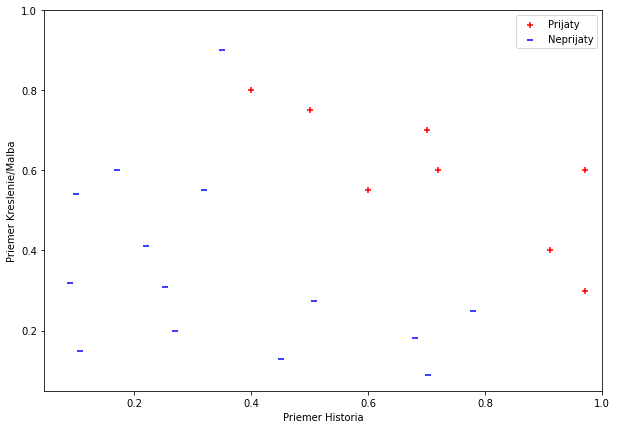

In [ ]:
def plot_svm(dataset):
    fig = plt.figure(figsize=(10, 7))
    data_pos = dataset.loc[data['class'] == 1]
    data_neg = dataset.loc[data['class'] == 0]

    pos_x = data_pos.to_numpy()[:, 0]
    pos_y = data_pos.to_numpy()[:, 1]
    neg_x = data_neg.to_numpy()[:, 0]
    neg_y = data_neg.to_numpy()[:, 1]

    plt.scatter(pos_x, pos_y, color='r', marker='+', label="Prijaty")
    plt.scatter(neg_x, neg_y, color='b', marker='_', label="Neprijaty")

    plt.ylim(top=1)
    plt.xlim(right=1)
    
    plt.xlabel('Priemer Historia')
    plt.ylabel('Priemer Kreslenie/Malba')
    plt.legend()
    
    plt.show()
    return fig

fig1 = plot_svm(data)


In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel='linear', C=1)
clf.fit(features, labels.to_numpy().ravel())
print(features)
print(labels)
print(clf)

    feature1  feature2
0      0.400     0.800
1      0.600     0.550
2      0.270     0.200
3      0.720     0.600
4      0.910     0.400
5      0.680     0.181
6      0.970     0.600
7      0.970     0.300
8      0.101     0.540
9      0.170     0.600
10     0.108     0.150
11     0.220     0.410
12     0.500     0.750
13     0.320     0.550
14     0.252     0.310
15     0.451     0.129
16     0.507     0.273
17     0.700     0.700
18     0.702     0.090
19     0.779     0.249
20     0.090     0.320
    class
0     1.0
1     1.0
2     0.0
3     1.0
4     1.0
5     0.0
6     1.0
7     1.0
8     0.0
9     0.0
10    0.0
11    0.0
12    1.0
13    0.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    0.0
20    0.0
SVC(C=1, kernel='linear')


In [ ]:
student = np.random.rand(1, 2)
pred = clf.predict(student)
print('student {} => {}'.format(student.ravel(), pred))

student [0.0649461  0.12202935] => [0.]


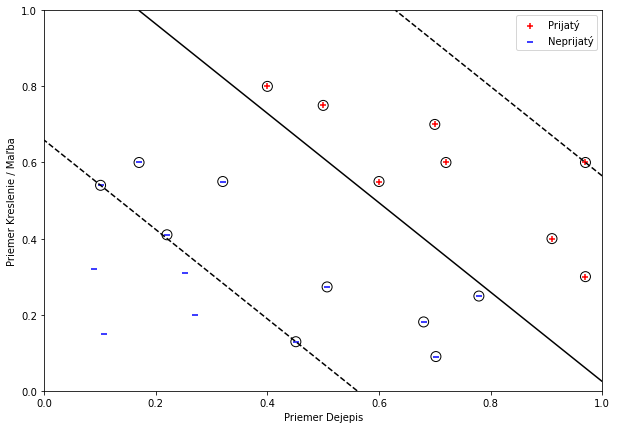

In [ ]:
def plot_svm(dataset, clf):
    fig = plt.figure(figsize=(10,7))
    
    positive_data = dataset.loc[dataset["class"] == 1]
    negative_data = dataset.loc[dataset["class"] == 0]
    
    pos_x = positive_data.to_numpy()[:, 0]
    pos_y = positive_data.to_numpy()[:, 1]
    neg_x = negative_data.to_numpy()[:, 0]
    neg_y = negative_data.to_numpy()[:, 1]
    
    plt.scatter(pos_x, pos_y, color="r", marker="+", label="Prijatý")
    plt.scatter(neg_x, neg_y, color="b", marker="_", label="Neprijatý")
    
    xx = np.linspace(0, 1, 30)
    yy = np.linspace(0, 1, 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)
    
    # decision boudary
    plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               linestyles=["--", "-", "--"])
    # support vectors
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors="none", edgecolors="k")
    
    plt.ylim(top=1)
    plt.xlim(right=1)
    plt.xlabel("Priemer Dejepis")
    plt.ylabel("Priemer Kreslenie / Maľba")
    plt.legend()
    
    plt.show()
    return fig

fig1 = plot_svm(data, clf)

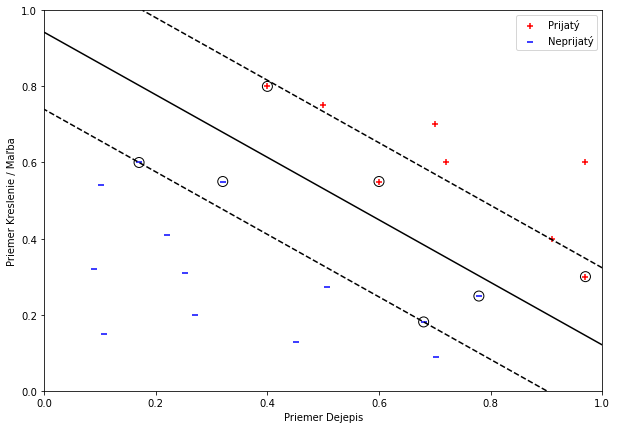

In [ ]:
clf = SVC(kernel='linear', C=10)
clf.fit(features, labels.to_numpy().ravel())
fig1 = plot_svm(data, clf)

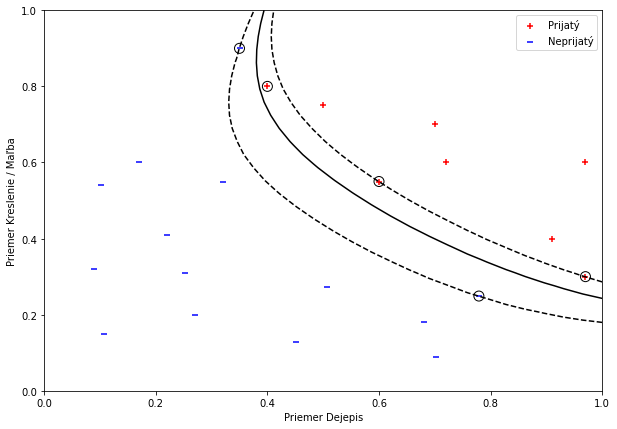

In [ ]:
data = pd.read_csv('./datasets/overfitting.csv')
features, labels = np.split(data, [2], axis=1)

clf = SVC(kernel='poly', C=100, degree=7, gamma=1, coef0=0)
clf.fit(features, labels.to_numpy().ravel())
fig1 = plot_svm(data, clf)

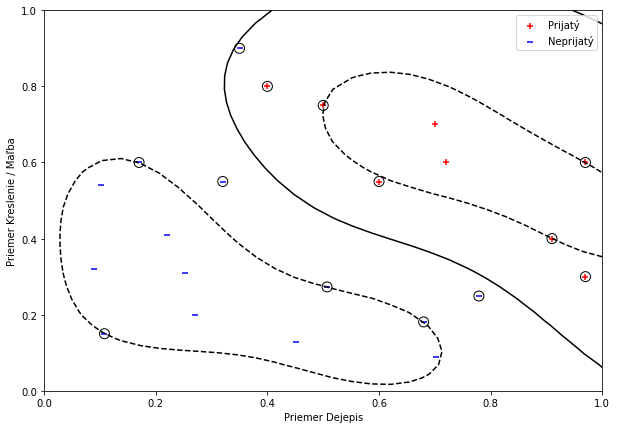

0.9545454545454546


In [ ]:
data = pd.read_csv('./datasets/overfitting.csv')
features, labels = np.split(data, [2], axis=1)

clf = SVC(kernel='rbf', C=1, gamma=10)
clf.fit(features, labels.to_numpy().ravel())
fig1 = plot_svm(data, clf)

score = clf.score(features, labels.to_numpy().ravel())
print(score)